### <center> Indian Cuisine Analysis </center>


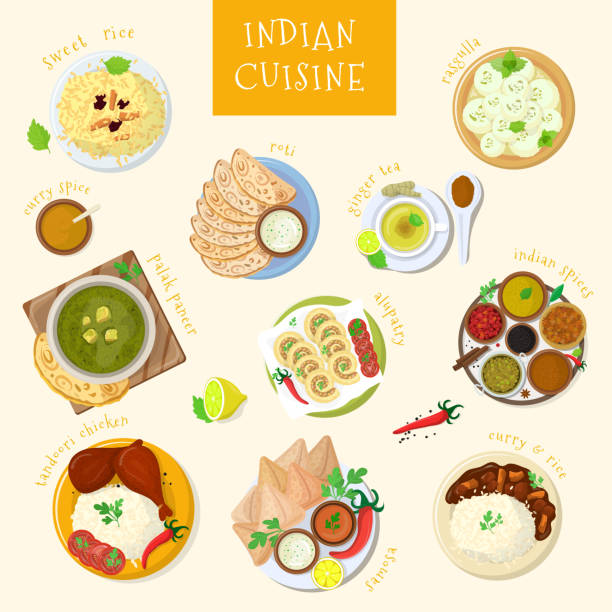

> **Indian Cuisine** consists of a variety of regional and traditional cuisines native to the Indian Subcontinent. Given the diversity in soil, climate, culture, ethnic groups, and occupations, these cuisines vary substantially and use locally available spices, herbs, vegetables, and fruits. Indian food is also heavily influenced by religion, cultural choices and traditions. Historical events such as invasions, trade relations, and colonialism have played a role in introducing certain foods to this country.

> This notebook comprises of some interesting facts and observations that people might not know about Indian cuisine.

### Table of Contents

* [Proportion of Vegetarian and Non-Vegetarian dishes](#chapter1)
* [Number of dishes based on regions](#section_1_1)
* [State-wise Distribution of Indian Sweets](#section_1_2)
* [Number of dishes based on courses of meal](#section_1_2_1)
* [Proportion of Flavor Profiles](#section_1_2_2)
* [Ingredients used in Indian desserts](#section_1_2_3)
* [Ingredients used in South-Indian cuisine](#section_1_2_4)
* [List of Indian dishes that are sweet in flavor but not desserts](#section_1_2_5)
* [Ingredients used in North-Indian cuisine](#section_1_2_6)
* [Overall Ingredients used in Indian cuisine](#section_1_2_7)
* [Comparing preparation time and cooking time for Veg and Non Veg dishes](#section_1_2_8)
* [Maharashtra Food - Mini Infograph](#section_1_2_9)
* [Ingredients used in Vegetarian food](#section_1_2_10)
* [Ingredients used in Non Vegetarian food](#section_1_2_11)
* [Top 10 snacks with shortest cooking time](#section_1_2_12)
* [Top 10 snacks with longest cooking time](#section_1_2_13)

In [210]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [211]:
df = pd.read_csv('../input/indian-food-101/indian_food.csv')
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [212]:
df.shape

(255, 9)

The dataset consists of about **255** Indian dishes and **9** columns associated with each of them.

The **9** columns are as follows:-

**name** : name of the dish

**ingredients** : main ingredients used

**diet** : type of diet - either vegetarian or non vegetarian

**prep_time** : preparation time

**cook_time** : cooking time

**flavor_profile** : flavor profile includes whether the dish is spicy, sweet, bitter, etc

**course** : course of meal - starter, main course, dessert, etc

**state** : state where the dish is famous or is originated

**region** : region where the state belongs


All the observations in this notebook will be based on these **255** dishes. There are many more dishes in Indian Cuisine! 

### Proportion of Vegetarian and Non-Vegetarian dishes <a class="anchor" id="chapter1"></a>

In [213]:
pie_df = df.diet.value_counts().reset_index()
pie_df.columns = ['diet','count']
fig = px.pie(pie_df, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['green', 'red'])
fig.show()

#### Observation : 
> Vegetarian dishes are **more** than Non Vegetarian dishes

#### Fun fact :
> India is ranked **top** in the world with **38%** of the total population being **vegetarians**

### Number of dishes based on regions <a class="anchor" id="section_1_1"></a>

In [214]:
reg_df = df.region.value_counts().reset_index()
reg_df.columns = ['region','count']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df,x='region',y='count',title='Number of dishes based on regions',
             color_discrete_sequence=['#316394'])
fig.show()

### State-wise Distribution of Indian Sweets <a class="anchor" id="section_1_2"></a>

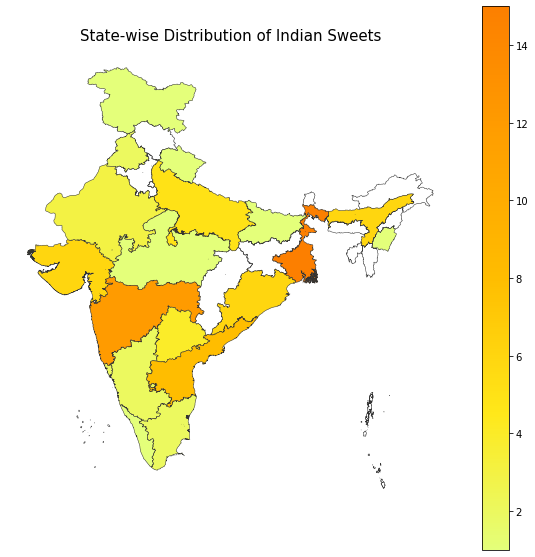

In [215]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
desserts = df[df['course']=='dessert']
des_df = desserts.state.value_counts().reset_index()
des_df.columns = ['state','count']
merged = shp_gdf.set_index('st_nm').join(des_df.set_index('state'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Sweets',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='count', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

#### Observation : 
> Most number of famous sweets are seen in the state of **West Bengal**

#### Fun fact : 
> There are more than **hundreds** of different varieties of sweets made in different states in India.

### Number of dishes based on courses of meal <a class="anchor" id="section_1_2_1"></a>

In [216]:
course_df = df.course.value_counts().reset_index()
course_df.columns = ['course','count']
course_df = course_df.sample(frac=1)
fig = px.bar(course_df,x='course',y='count',title='Number of dishes based on courses of meal',
             color_discrete_sequence=['#AB63FA'])
fig.show()

#### Observation : 
> About **129** dishes are preferably eaten as a main course

#### Fun fact : 
> The very favourite **Chicken Tikka Masala**, a popular dish in India, is **not Indian**. It was invented in **Glasgow, Scotland**!

### Proportion of Flavor Profiles <a class="anchor" id="section_1_2_2"></a>

In [217]:
pie_df = df.flavor_profile.value_counts().reset_index()
pie_df.columns = ['flavor','count']
fig = px.pie(pie_df, values='count', names='flavor', title='Proportion of Flavor Profiles',
             color_discrete_sequence=['#FF7F0E', '#00B5F7','#AB63FA','#00CC96'])
fig.show()

#### Observation : 
> More than **50%** of the dishes are **spicy** in flavor

#### Fun fact :  
> India is the **largest** producer of **spices** in the **world**. No country in the world produces as many varieties of spices as India. 

> According to **Ayurveda**, Indian food is a balance of **6** flavors: **sweet**, **sour**, **salty**, **bitter**, **spicy**, and **astringent**. Each flavor is imparted from a particular ingredient in a dish. This is the uniqueness of Indian cuisine!

### Ingredients used in Indian desserts <a class="anchor" id="section_1_2_3"></a>

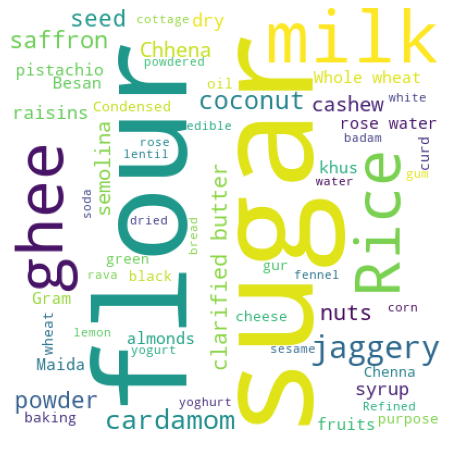

In [218]:
dessert_df  = df[df['course']=='dessert'].reset_index()

ingredients = []
for i in range(0,len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

**Observation** : 
> Commonly used ingredients in making Indian sweets are **Sugar, Ghee, Milk, Rice**

#### Fun fact :  
>**Mysore Pak** is a 3-ingredient dessert prepared using gram flour, ghee, and sugar. It’s history dates back to the 17th or 18th century and is known to be a traditional South Indian sweet that finds relevance on special occasions and festivals. It is said that **Kakasura Madappa**, the head chef in the Royal Kingdom of **Mysore** in the reign of King **Krishna Raja Wodeyar** who made Mysore Pak for the first time. The story goes like this that the King was ready to have lunch, however, there was one spot vacant in his Thali. And so, Madappa quickly prepared a sweet dish using gram flour, ghee, and sugar and let it cool down. By the time, the King finished his meal and was looking for sweet, Madappa served him the cooled cake. The sweet melted in his mouth and the King wanted another one and then asked for its name. Madappa was so nervous at that time that he named it ‘Mysore Paka’, where ‘**paka**’ means a sweet concoction in **Kannada**. Soon, it was given the status of royal sweet and from there on the legacy continues.

### Ingredients used in South-Indian cuisine <a class="anchor" id="section_1_2_4"></a>

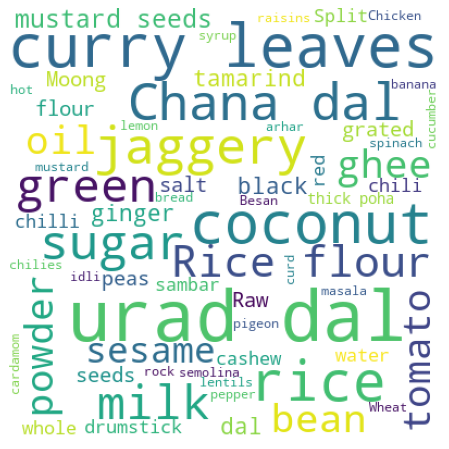

In [219]:
south_df = df[df['region']=='South'].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

**Observation** : 
> Commonly used ingredients in South-Indian cuisine are **Urad Dal, Curry leaves, Coconut, Rice**.

#### Fun fact :  
> South Indian Cuisine as we all think is pretty much **dosas** and **idlis**. But it is way beyond these and there a few popular South Indian dishes, that you wouldn’t have even heard of, before. While the state of **Andhra** has **Pesarattu**, **Upma** and **Pulihaara**, **Karnataka** South Indian food is pretty unique and you will be surprised to know, that to boost the taste, they use sweeteners such as **jaggery** and **sugar**.

### List of Indian dishes that are sweet in flavor but not desserts <a class="anchor" id="section_1_2_5"></a>

In [220]:
sweet_df = df[df['flavor_profile']=='sweet']
final_sweet_df = sweet_df[sweet_df['course']!='dessert']
#final_sweet_df

* Obbattu Holige
* Dal Makhani
* Mishti Cholar Dal

### Ingredients used in North-Indian cuisine <a class="anchor" id="section_1_2_6"></a>

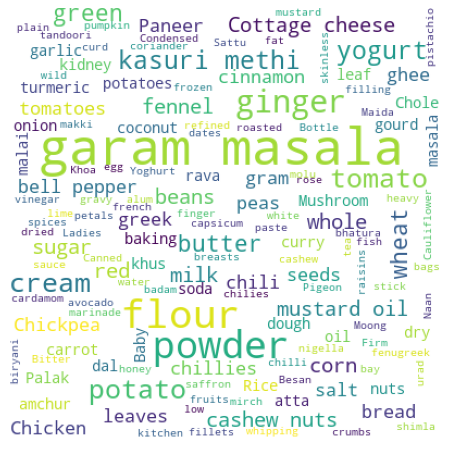

In [221]:
north_df = df[df['region']=='North'].reset_index()

ingredients = []
for i in range(0,len(north_df)):
    text = north_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

#### Observation : 
> Commonly used ingredients in North Indian cuisine are **Garam Masala, Ginger, Flour, Chickpeas**.


### Overall Ingredients used in Indian cuisine <a class="anchor" id="section_1_2_7"></a>

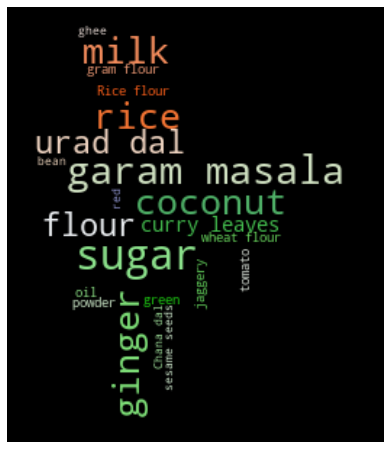

In [222]:
ingredients = []
for i in range(0,len(df)):
    text = df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

india_coloring = np.array(Image.open('../input/images/ind.jpg'))

wc = WordCloud(background_color="black", width = 400, height = 400,mask=india_coloring,min_font_size=8)
wc.generate(text)

image_colors = ImageColorGenerator(india_coloring)

plt.figure(figsize = (8, 8))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

### Comparing preparation time and cooking time for Veg and Non Veg dishes <a class="anchor" id="section_1_2_8"></a>

In [223]:
fig = px.scatter(df,x='cook_time',y='prep_time',color='diet',
                 color_discrete_sequence=['green','red'], hover_data = ['name'],
                 labels={
                     'cook_time': 'Cooking time (minutes)',
                     'prep_time': 'Preparation time (minutes)'
                 })
fig.show()

### Maharashtra Food - Mini Infograph <a class="anchor" id="section_1_2_9"></a>

In [224]:
mah_df = df[df['state']=='Maharashtra']

total_dishes = mah_df.shape[0]

course_df = mah_df['course'].value_counts().reset_index()
course_df.columns = ['course','num']

diet_df = mah_df['diet'].value_counts().reset_index()
diet_df.columns = ['diet','num']

fig = make_subplots(
    rows=2, cols=2,subplot_titles=('Total Dishes','Dishes by Courses','', ''),
    specs=[[{'type': 'indicator'},{'type': 'bar','rowspan': 2} ],
          [ {'type': 'pie'} , {'type': 'pie'}]])

fig.add_trace(go.Indicator(
    mode = 'number',
    value = int(total_dishes),
    number={'font':{'color': 'blue','size':50}},
),row=1, col=1)


fig.add_trace(go.Bar(
    x=course_df['course'],y=course_df['num'],
    marker={'color': 'orange'},  
    text=course_df['num'],
    name='dishes by courses',
    textposition ='auto'),row=1, col=2)

fig.add_trace(go.Pie(labels=diet_df['diet'], 
                     values=diet_df['num'],textinfo='percent',
                    marker= dict(colors=['green','red'])),row=2, col=1)


fig.update_layout(
    title_text='Maharashtra Food-Mini Infograph',template='plotly',
    title_x=0.5)

fig.show()

### Ingredients used in Vegetarian food <a class="anchor" id="section_1_2_10"></a>

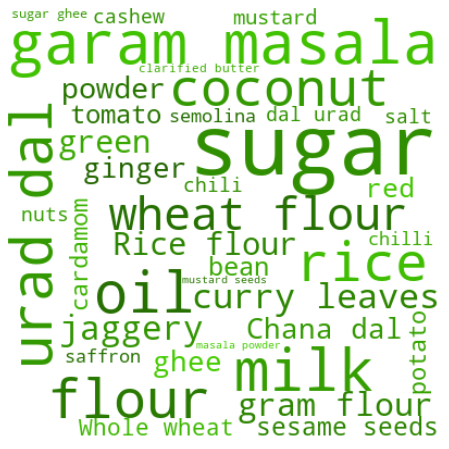

In [225]:
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(100, 100%%, %d%%)" % random.randint(20, 40)


veg_df = df[df['diet']=='vegetarian'].reset_index()

ingredients = []
for i in range(0,len(veg_df)):
    text = veg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 

default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")

plt.axis('off') 
plt.show()

#### Fun fact :  
> India has the world’s **second-lowest** rates of meat consumption per person. Yet the majority of the country does not follow a vegetarian diet, as commonly believed. As per a survey released by the government of India, only about **29%** of the country’s population follows a **vegetarian** diet.

### Ingredients used in Non Vegetarian food <a class="anchor" id="section_1_2_11"></a>

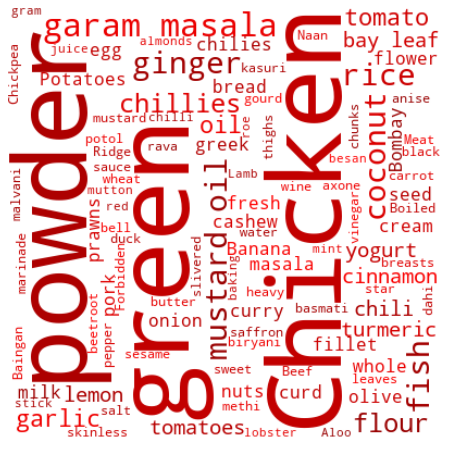

In [226]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)


nveg_df = df[df['diet']=='non vegetarian'].reset_index()

ingredients = []
for i in range(0,len(nveg_df)):
    text = nveg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 400, height = 400, background_color ='white', 
                min_font_size = 10).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 

default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3),
           interpolation="bilinear")

plt.axis('off') 
plt.show()

### Top 10 snacks with shortest cooking time <a class="anchor" id="section_1_2_12"></a>

In [227]:
snack_df = df[df['course']=='snack']

short_sort_snack_df = snack_df.sort_values(['cook_time'],ascending=True).iloc[:10,:]

fig = px.bar(short_sort_snack_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()

### Top 10 snacks with longest cooking time <a class="anchor" id="section_1_2_13"></a>

In [228]:
long_sort_snack_df = snack_df.sort_values(['cook_time'],ascending=False).iloc[3:13,:]

fig = px.bar(long_sort_snack_df,y='name',x='cook_time',
             orientation='h',color='cook_time',
            labels={'name':'Name of snack','cook_time':'Cooking time (minutes)'})
fig.show()

### I will update more soon...